In [0]:
dbutils.fs.mkdirs("/FileStore/mydata")

Out[1]: True

In [0]:
dbutils.fs.ls("/FileStore/mydata")

Out[3]: [FileInfo(path='dbfs:/FileStore/mydata/articles1.json/', name='articles1.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/articles2.json/', name='articles2.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/content_articles1.csv', name='content_articles1.csv', size=5207, modificationTime=1729793415000),
 FileInfo(path='dbfs:/FileStore/mydata/content_articles2.csv', name='content_articles2.csv', size=4902, modificationTime=1729793415000),
 FileInfo(path='dbfs:/FileStore/mydata/content_register.csv', name='content_register.csv', size=1725, modificationTime=1729793416000),
 FileInfo(path='dbfs:/FileStore/mydata/register.json/', name='register.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/test.txt', name='test.txt', size=19, modificationTime=1730394719000)]

In [0]:
# Write a test file to FileStore
dbutils.fs.put("/FileStore/mydata/test.txt", "This is a test file", overwrite=True)

# Now check if the file is there
dbutils.fs.ls("/FileStore/mydata")


Wrote 19 bytes.
Out[5]: [FileInfo(path='dbfs:/FileStore/mydata/articles1.json/', name='articles1.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/articles2.json/', name='articles2.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/content_articles1.csv', name='content_articles1.csv', size=5207, modificationTime=1729793415000),
 FileInfo(path='dbfs:/FileStore/mydata/content_articles2.csv', name='content_articles2.csv', size=4902, modificationTime=1729793415000),
 FileInfo(path='dbfs:/FileStore/mydata/content_register.csv', name='content_register.csv', size=1725, modificationTime=1729793416000),
 FileInfo(path='dbfs:/FileStore/mydata/register.json/', name='register.json/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/mydata/test.txt', name='test.txt', size=19, modificationTime=1730973439000)]

In [0]:
# Load the CSV files into DataFrames
articles1_df = spark.read.csv("/FileStore/mydata/content_articles1.csv", header=True, inferSchema=True)
articles2_df = spark.read.csv("/FileStore/mydata/content_articles2.csv", header=True, inferSchema=True)
register_df = spark.read.csv("/FileStore/mydata/content_register.csv", header=True, inferSchema=True)

# Display the data
articles1_df.show()
articles2_df.show()
register_df.show()


+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|                 _id|Article_id|Photos[0].index|Photos[1].index|       Photos[0].src|       Photos[1].src|Textcontent[0].index|Textcontent[1].index| Textcontent[0].text| Textcontent[1].text|            headline|       Author|likes|
+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|67135418f4dcc9d09...|         4|              0|              1|https://picsum.ph...|https://picsum.ph...|                   0|                   1|The Solar Energy ...|This breakthrough...|University Resear...|    David Lee|    9|
|67135418f4dcc9d09...|        10|              0|              1|htt

In [0]:
# Convert to JSON
articles1_df.write.json("/FileStore/mydata/articles1.json")
articles2_df.write.json("/FileStore/mydata/articles2.json")
register_df.write.json("/FileStore/mydata/register.json")


---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-2971901407646158>:2
      1 # Convert to JSON
----> 2 articles1_df.write.json("/FileStore/mydata/articles1.json")
      3 articles2_df.write.json("/FileStore/mydata/articles2.json")
      4 register_df.write.json("/FileStore/mydata/register.json")

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:1592, in DataFrameWriter.json(self, path, mode, compression, dateFormat, timestampFormat, lineSep, encoding, ignoreNullFields)
   1583 self.mode(mode)
   15

In [0]:
articles1_df.printSchema()
articles2_df.printSchema()
register_df.printSchema()

root
 |-- _id: string (nullable = true)
 |-- Article_id: integer (nullable = true)
 |-- Photos[0].index: integer (nullable = true)
 |-- Photos[1].index: integer (nullable = true)
 |-- Photos[0].src: string (nullable = true)
 |-- Photos[1].src: string (nullable = true)
 |-- Textcontent[0].index: integer (nullable = true)
 |-- Textcontent[1].index: integer (nullable = true)
 |-- Textcontent[0].text: string (nullable = true)
 |-- Textcontent[1].text: string (nullable = true)
 |-- headline: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- likes: integer (nullable = true)

root
 |-- _id: string (nullable = true)
 |-- Article_id: integer (nullable = true)
 |-- Photos[0].index: integer (nullable = true)
 |-- Photos[1].index: integer (nullable = true)
 |-- Photos[0].src: string (nullable = true)
 |-- Photos[1].src: string (nullable = true)
 |-- Textcontent[0].index: integer (nullable = true)
 |-- Textcontent[1].index: integer (nullable = true)
 |-- Textcontent[0].text: strin

In [0]:
# Example: Group by author and count articles per author
articles_per_author = articles1_df.groupBy("author").count()
articles_per_author.show()


+-------------+-----+
|       author|count|
+-------------+-----+
|   Emma Stone|    1|
|Anna Williams|    1|
|   Lily Davis|    1|
| Rachel Green|    1|
|Sarah Johnson|    1|
| Tom Anderson|    1|
|Daniel Cooper|    1|
|     John Doe|    1|
|    David Lee|    1|
| Preeti Patil|    1|
+-------------+-----+



In [0]:
# Example: Get distinct authors
distinct_authors = articles1_df.select("author").distinct()
distinct_authors.show()


+-------------+
|       author|
+-------------+
|   Emma Stone|
|Anna Williams|
|   Lily Davis|
| Rachel Green|
|Sarah Johnson|
| Tom Anderson|
|Daniel Cooper|
|     John Doe|
|    David Lee|
| Preeti Patil|
+-------------+



In [0]:
# Sort articles by "likes" in descending order and show the top articles
most_liked_articles = articles1_df.orderBy("likes", ascending=False)

# Display the top 10 articles with the most likes
most_liked_articles.show(1)


+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|                 _id|Article_id|Photos[0].index|Photos[1].index|       Photos[0].src|       Photos[1].src|Textcontent[0].index|Textcontent[1].index| Textcontent[0].text| Textcontent[1].text|            headline|       Author|likes|
+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|67135a92f4dcc9d09...|        21|              0|              1|https://picsum.ph...|https://picsum.ph...|                   0|                   1|The university's ...|The drone is equi...|Engineering Depar...|Daniel Cooper|   40|
+--------------------+----------+---------------+---------------+---

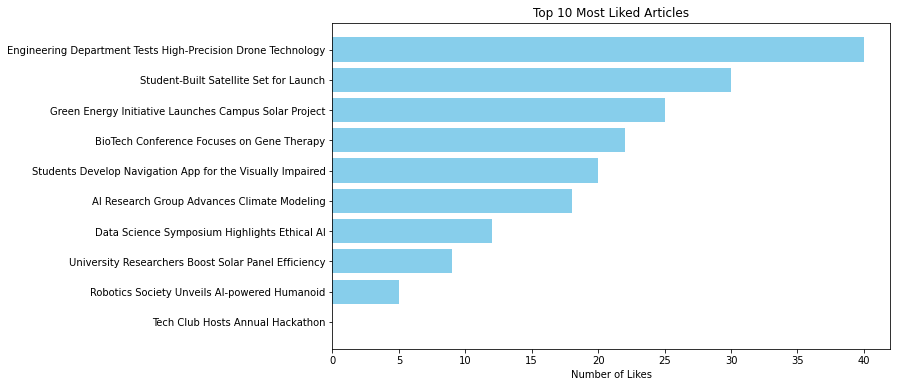

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort articles by "likes" in descending order and select the top 10
top_liked_articles_df = articles1_df.orderBy("likes", ascending=False).limit(10)

# Convert Spark DataFrame to Pandas DataFrame for visualization
top_liked_articles_pd = top_liked_articles_df.select("headline", "likes").toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(top_liked_articles_pd["headline"], top_liked_articles_pd["likes"], color="skyblue")
plt.xlabel("Number of Likes")
plt.title("Top 10 Most Liked Articles")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest likes on top

# Display the plot
plt.show()


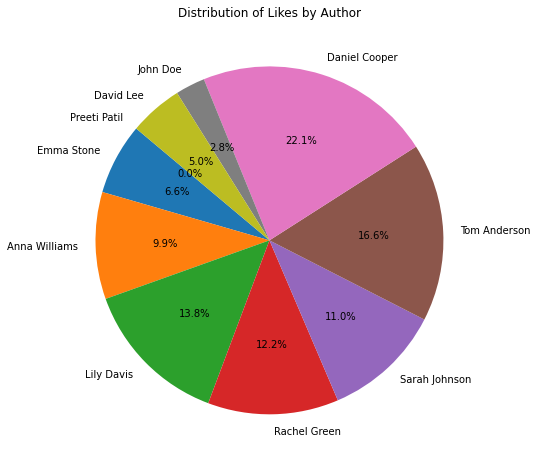

In [0]:
# Prepare the data for a pie chart of likes by Author
likes_by_author = articles1_df.groupBy("Author").sum("likes").toPandas()
likes_by_author.columns = ["Author", "total_likes"]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(likes_by_author["total_likes"], labels=likes_by_author["Author"], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Likes by Author")
plt.show()

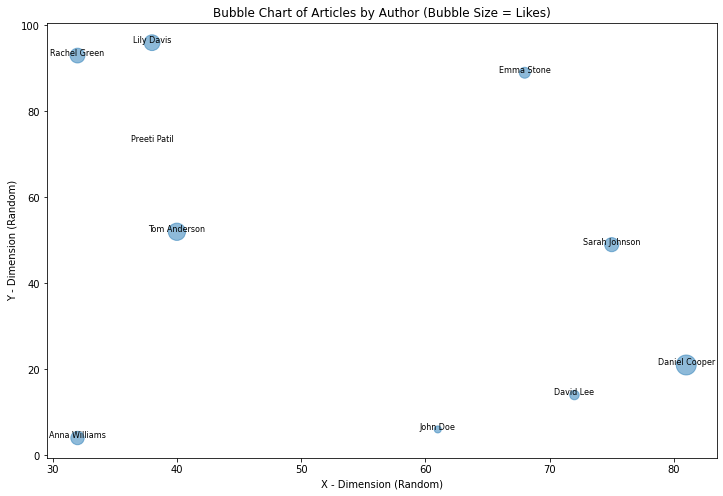

In [0]:
import numpy as np

# Prepare data
authors_articles_df = articles1_df.select("Author", "headline", "likes").toPandas()

# Assign random positions for demonstration (e.g., could be popularity rank if relevant)
authors_articles_df["x"] = np.random.randint(1, 100, size=len(authors_articles_df))
authors_articles_df["y"] = np.random.randint(1, 100, size=len(authors_articles_df))

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(authors_articles_df["x"], authors_articles_df["y"], s=authors_articles_df["likes"] * 10, alpha=0.5, label=authors_articles_df["Author"])
for i in range(len(authors_articles_df)):
    plt.text(authors_articles_df["x"][i], authors_articles_df["y"][i], authors_articles_df["Author"][i], ha='center', fontsize=8)
plt.xlabel("X - Dimension (Random)")
plt.ylabel("Y - Dimension (Random)")
plt.title("Bubble Chart of Articles by Author (Bubble Size = Likes)")
plt.show()

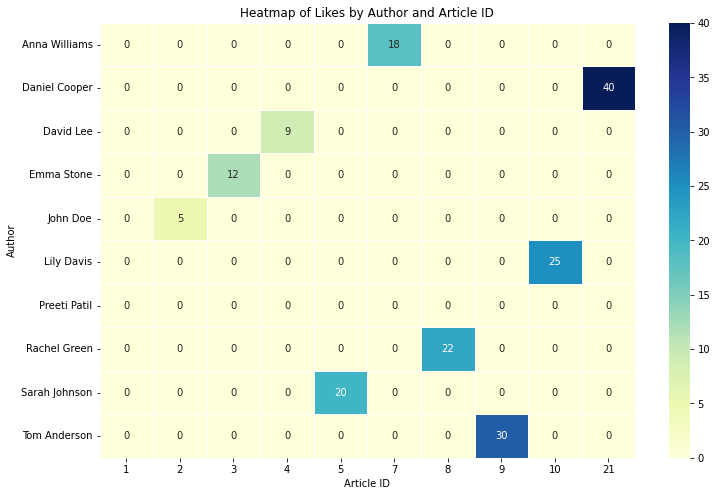

In [0]:
import seaborn as sns

# Prepare data for heatmap
likes_heatmap_data = articles1_df.groupBy("Author", "Article_id").sum("likes").toPandas()
likes_heatmap_data.columns = ["Author", "Article_id", "total_likes"]

# Pivot table for heatmap
heatmap_data = likes_heatmap_data.pivot(index="Author", columns="Article_id", values="total_likes").fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Likes by Author and Article ID")
plt.xlabel("Article ID")
plt.ylabel("Author")
plt.show()

In [0]:
# Top 5 articles by likes
most_liked_articles = articles1_df.orderBy("likes", ascending=False).limit(5)
most_liked_articles.show()

# Bottom 5 articles by likes
least_liked_articles = articles1_df.orderBy("likes", ascending=True).limit(5)
least_liked_articles.show()

+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|                 _id|Article_id|Photos[0].index|Photos[1].index|       Photos[0].src|       Photos[1].src|Textcontent[0].index|Textcontent[1].index| Textcontent[0].text| Textcontent[1].text|            headline|       Author|likes|
+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+
|67135a92f4dcc9d09...|        21|              0|              1|https://picsum.ph...|https://picsum.ph...|                   0|                   1|The university's ...|The drone is equi...|Engineering Depar...|Daniel Cooper|   40|
|67135418f4dcc9d09...|         9|              0|              1|htt

In [0]:
avg_likes_by_author = articles1_df.groupBy("Author").avg("likes").orderBy("avg(likes)", ascending=False)
avg_likes_by_author.show()

+-------------+----------+
|       Author|avg(likes)|
+-------------+----------+
|Daniel Cooper|      40.0|
| Tom Anderson|      30.0|
|   Lily Davis|      25.0|
| Rachel Green|      22.0|
|Sarah Johnson|      20.0|
|Anna Williams|      18.0|
|   Emma Stone|      12.0|
|    David Lee|       9.0|
|     John Doe|       5.0|
| Preeti Patil|       0.0|
+-------------+----------+



In [0]:
# Install TextBlob
%pip install textblob

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark.sql.functions import when

articles1_df = articles1_df.withColumn(
    "category",
    when(articles1_df.headline.contains("Tech"), "Technology")
    .when(articles1_df.headline.contains("Health"), "Health")
    .when(articles1_df.headline.contains("Finance"), "Finance")
    .otherwise("Other")
)
articles1_df.show()

+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+----------+
|                 _id|Article_id|Photos[0].index|Photos[1].index|       Photos[0].src|       Photos[1].src|Textcontent[0].index|Textcontent[1].index| Textcontent[0].text| Textcontent[1].text|            headline|       Author|likes|  category|
+--------------------+----------+---------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-----+----------+
|67135418f4dcc9d09...|         4|              0|              1|https://picsum.ph...|https://picsum.ph...|                   0|                   1|The Solar Energy ...|This breakthrough...|University Resear...|    David Lee|    9|     Other|
|67135418f4dcc9d09...|  

In [0]:
# Tokenize and count words in headlines
from pyspark.sql.functions import explode, split

word_counts = (articles1_df.select(explode(split(articles1_df.headline, " ")).alias("word"))
               .groupBy("word").count().orderBy("count", ascending=False))
word_counts.show()


+-----------+-----+
|       word|count|
+-----------+-----+
|        for|    2|
|      Solar|    2|
|         AI|    2|
|     Annual|    1|
|       Data|    1|
| Navigation|    1|
| Highlights|    1|
|    Science|    1|
|    Unveils|    1|
|      Hosts|    1|
|Engineering|    1|
|     Energy|    1|
| Department|    1|
|    Therapy|    1|
|  Hackathon|    1|
|      Group|    1|
|    Climate|    1|
|   Students|    1|
| Efficiency|    1|
| Initiative|    1|
+-----------+-----+
only showing top 20 rows

